## Upper Confidence Bound

## Importing the dataset

In [3]:
dataset = read.csv('Ads_CTR_Optimisation.csv')
head(dataset)

Ad.1,Ad.2,Ad.3,Ad.4,Ad.5,Ad.6,Ad.7,Ad.8,Ad.9,Ad.10
1,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0


## Implementing UCB

In [4]:
N = 10000
d = 10
ads_selected = integer(0)
numbers_of_selections = integer(d)
sums_of_rewards = integer(d)
total_reward = 0

for (n in 1:N) {
    ad = 0
    max_upper_bound = 0
    for (i in 1:d) {
    if (numbers_of_selections[i] > 0) {
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = sqrt(3/2 * log(n) / numbers_of_selections[i])
        upper_bound = average_reward + delta_i
    } else {
        upper_bound = 1e400
    }
    if (upper_bound > max_upper_bound) {
        max_upper_bound = upper_bound
        ad = i
    }
    }
    ads_selected = append(ads_selected, ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
}

## Visualising the results

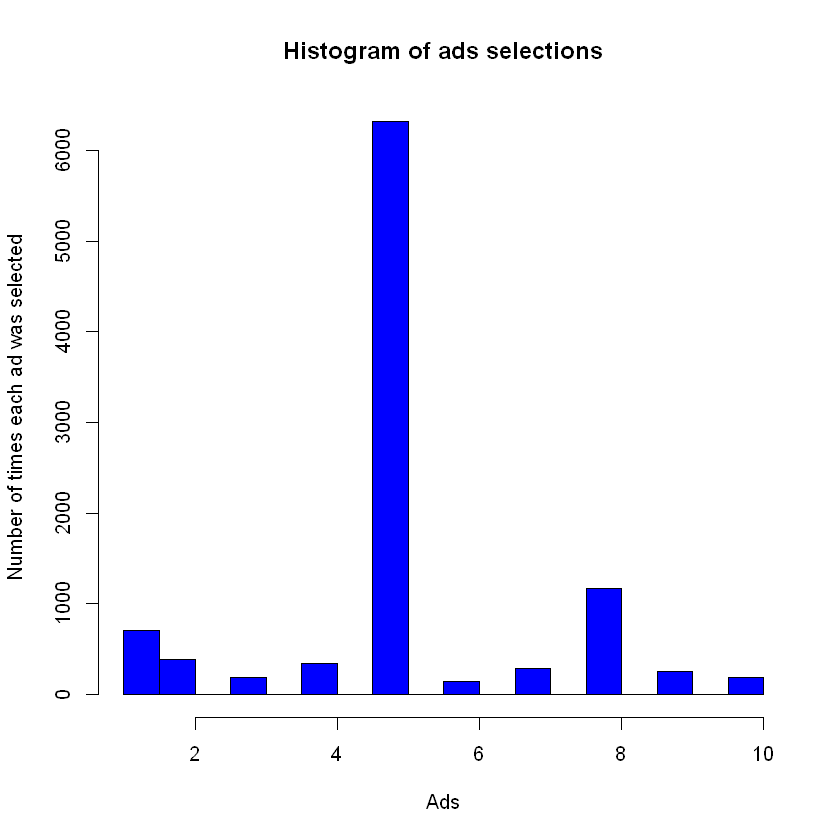

In [5]:
hist(ads_selected,
     col='blue',
     main='Histogram of ads selections',
     xlab='Ads',
     ylab='Number of times each ad was selected')